# Laboratorium 7 - Klasyfikacja, Regresja Logistyczna, SVM

Celem laboratorium jest praktyczna implementacja podstawowego algorytmu klasyfikacji: regresji logistycznej, oraz wykorzystanie gotowej implementacji maszyny wektorów nośnych (support vector machine - SVM). Zakładam, że zagadnienie klasyfikacji oraz podstawy teoretyczne regresji logistycznej oraz SVM są znane z wykładu.

Zacznijmy od importu bibliotek oraz wygenerowania przykładowego zbioru punktów:

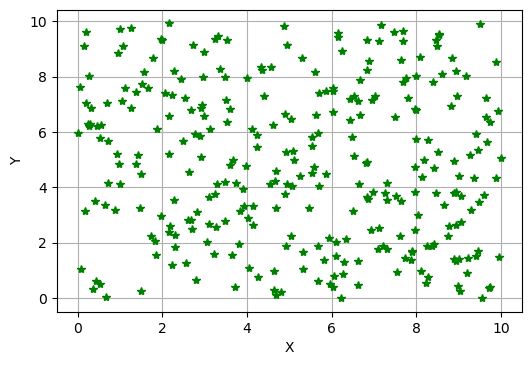

In [41]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.linear_model as lm
import sklearn.svm as svm

%matplotlib inline

np.random.seed(12345)

n_points = 300
X = np.random.rand(n_points, 2)*10
plt.figure(dpi=100)
plt.plot(X[:, 0], X[:, 1], "g*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Podzielmy wygenerowane punkty na dwa zbiory dzielące go na klasy.
Niech pierwszy zbiór dzieli punkty na punkty powyżej prostej o równaniu y = x oraz poniżej tej prostej.

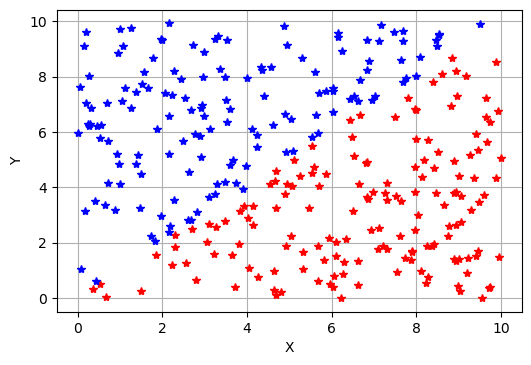

In [42]:
y1 = X[:, 1] > X[:, 0]

plt.figure(dpi=100)
plt.plot(X[:, 0][y1 == 0], X[:, 1][y1 == 0], "r*")
plt.plot(X[:, 0][y1 == 1], X[:, 1][y1 == 1], "b*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

W ten sposób dokonaliśmy podziału wygenerowanego zbioru na dwie klasy - klasy punktów niebieskich i czerwonych. Dokonaj analogicznego podziału w taki sposób, aby punkty leżące wewnątrz okręgu o środku w punkcie (5,5) i promieniu 2 należały do klasy niebieskiej, a punkty leżące na zewnątrz tego okręgu należały do klasy czerwonej.

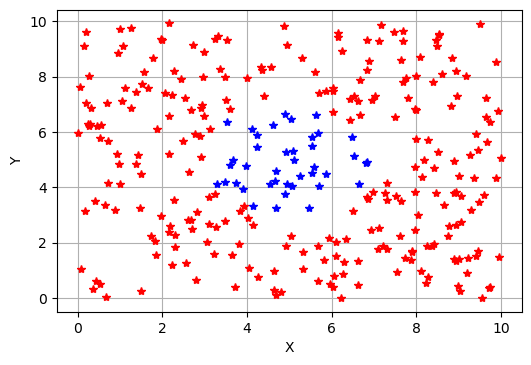

In [43]:
y2 = (abs(X[:, 1] - 5))**2 + (abs(X[:, 0] - 5))**2 < 4

plt.figure(dpi=100)
plt.plot(X[:, 0][y2 == 1], X[:, 1][y2 == 1], "b*")
plt.plot(X[:, 0][y2 == 0], X[:, 1][y2 == 0], "r*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

W ten sposób zostały wygenerowane dwa zbiory, na których będziemy dokonywać klasyfikacji, tj. próbować określić do której klasy należy nowo wygenerowany punkt.
W tym celu wygenerujmy nowy zbiór punktów, będący zbiorem testowym:

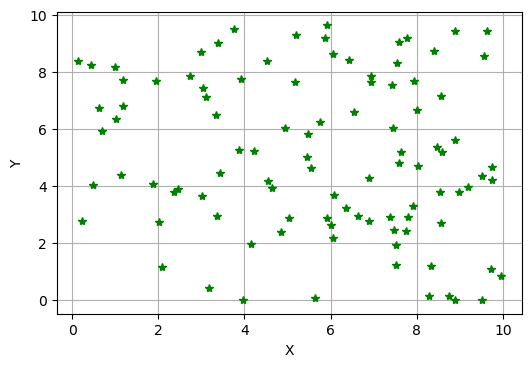

In [61]:
X_test = np.random.rand(100, 2)*10
plt.figure(dpi=100)
plt.plot(X_test[:, 0], X_test[:, 1], "g*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Zacznijmy od próby klasyfikacji zbioru testowego korzystajac z regresji logistycznej. Korzystając z funkcji dostępnej w bibliotece sklearn użyj regresji logistycznej, aby dokonać klasyfikacji wygenerowanego zbioru testowego zarówno dla podziału pierwszego (prosta odzielające) jak i podziału drugiego (wnętrze okręgu).

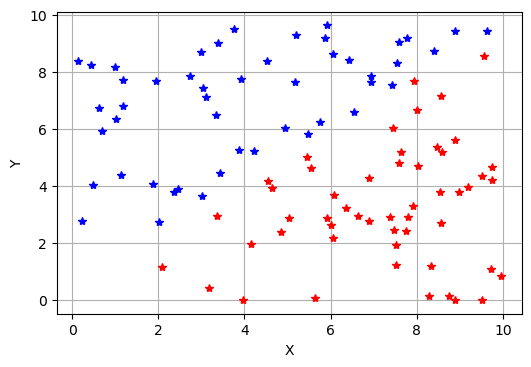

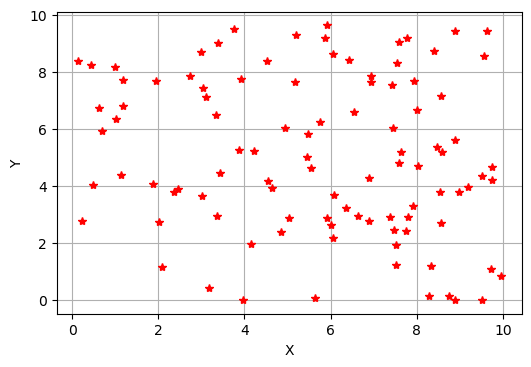

In [63]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')


Y = X_test[:, 0] > X_test[:, 1]

logreg.fit(X_test,Y)

plt.figure(dpi=100)
plt.plot(X_test[:, 0][logreg.predict(X_test) == 0], X_test[:, 1][logreg.predict(X_test) == 0], "b*")
plt.plot(X_test[:, 0][logreg.predict(X_test) == 1], X_test[:, 1][logreg.predict(X_test) == 1], "r*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


Y = (X_test[:, 1] - 5)**2 > 4 - (X_test[:, 0] - 5)**2

logreg.fit(X_test,Y)
           
plt.figure(dpi=100)
plt.plot(X_test[:, 0][logreg.predict(X_test) == 0], X_test[:, 1][logreg.predict(X_test) == 0], "b*")
plt.plot(X_test[:, 0][logreg.predict(X_test) == 1], X_test[:, 1][logreg.predict(X_test) == 1], "r*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


Wygląda na to, że klasyfikacja "działa" poprawnie dla podziału na klasy rozdzielone prostą, natomiast nie działa w ogóle dla okręgu. Dlaczego? Jak liczbowo ocenić jakość klasyfikacji? Zapoznaj się z pojęciem macierzy pomyłek, błędów I, II rodzaju, F1-Score. Zanim przejdziemy do poprawnej klasyfikacji dla okręgu, dokonaj samodzielnej implementacji regresji logistycznej operatej o metodę spadku gradientowego.

In [46]:
def sigmoid(x):
     return 1 / (1 + np.exp(-x))
    
def loss(h, y):
    return (-1 * y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def logistic_regression_ours(X, y, learning_rate=0.01, num_iters=100):
    """
    X - macierz próbek/cech
    y - wektor przyjmowanych wartości  
    """
    theta = np.zeros(X.shape[1])
    for i in range(num_iters):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / y.size
        theta -= learning_rate * gradient
        print("Current loss:", loss(h, y))
    return theta
    

def classify(X, theta):
    """
    X - macierz próbek/cech
    theta - parametry modelu
    """
    return sigmoid(np.dot(X, theta))
    

Przykładowy rezultat:

Current loss: 0.6931471805599453
Current loss: 0.26682171696846174
Current loss: 0.5314386552146678
Current loss: 1.843689473916088
Current loss: 1.7804422913957558
Current loss: 1.010802598756707
Current loss: 0.5209780825185627
Current loss: 0.3286724554561414
Current loss: 0.26103903363486053
Current loss: 0.1983585712691299
Current loss: 0.16230920676362742
Current loss: 0.13675297667428774
Current loss: 0.11677953738364373
Current loss: 0.10535194667820122
Current loss: 0.09555465256960204
Current loss: 0.0899990118240023
Current loss: 0.0852653753146161
Current loss: 0.08240090347274014
Current loss: 0.08006406904029412
Current loss: 0.07853469394640582
Current loss: 0.07732246805004692
Current loss: 0.076455168767103
Current loss: 0.07575577023532204
Current loss: 0.07520071325654934
Current loss: 0.07472529570303593
Current loss: 0.07430924425107541
Current loss: 0.07392876632630277
Current loss: 0.07357333759144694
Current loss: 0.07323434904049667
Current loss: 0.072907371806

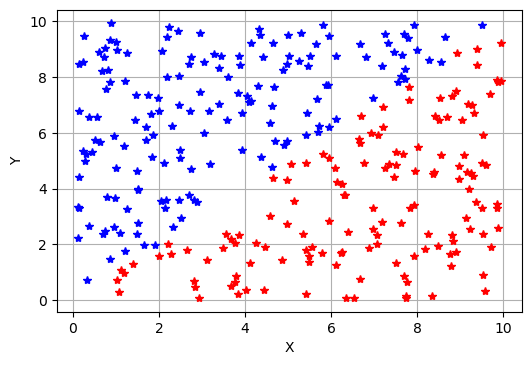

In [51]:
X = np.random.rand(n_points, 2)*10
y1 = X[:, 1] > X[:, 0]

lr_own = logistic_regression_ours(X, y1, learning_rate=0.6, num_iters=50)
print("Model coefficients: ", lr_own)
result = classify(X, lr_own)

plt.figure(dpi=100)
plt.plot(X[:, 0][result < 0.5 ], X[:, 1][result < 0.5 ], "r*")
plt.plot(X[:, 0][result > 0.5 ], X[:, 1][result > 0.5 ], "b*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Wróćmy do problemu do klasyfikacji punktów wewnątrz / na zewnątrz okręgu. Regresja logistyczna nie jest w stanie bezpośrednio poradzić sobie z tym problemem (chociaż można dokonać transformacji danych w taki sposób, aby było to możliwe, np. poprzez transformacje do współrzędnych biegunowych). Spróbuj dokonać klasyfikacji korzystając z gotowej implemetnacji SVM w bibliotece sklearn (dobierz odpowiednie jądro i jego parametry). W jaki sposób jądro SVM wpływa na zdolność klasyfikacji? Jak wpływają na to poszczególne parametry? Dokonaj zagęszczenia zbioru testowego, aby zobaczyć dokładne punkty podziału.

Przykładowy rezultat:

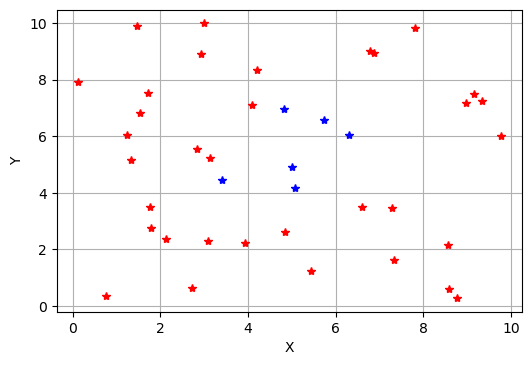

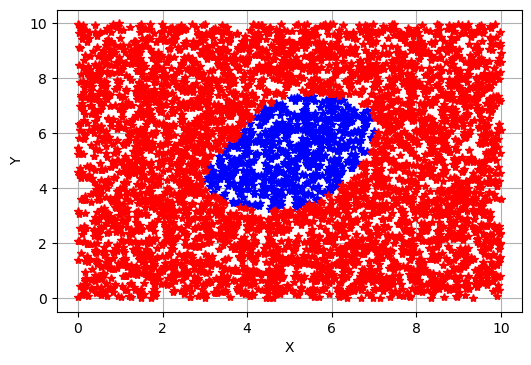

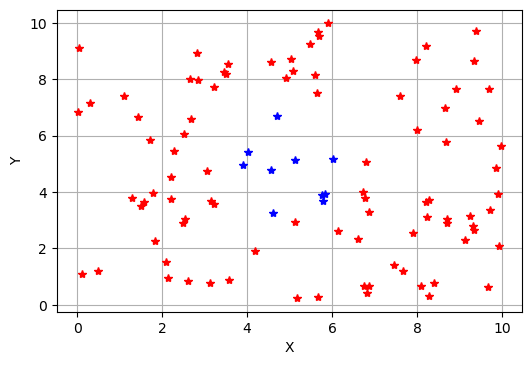

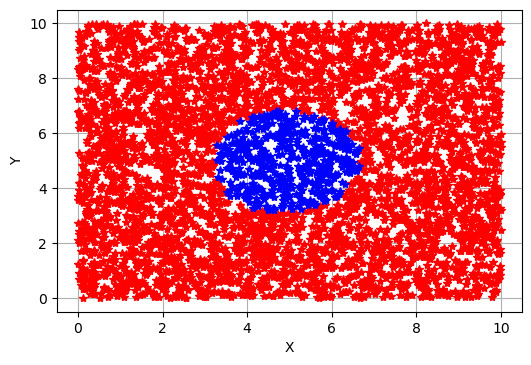

In [64]:
from sklearn import svm
from sklearn.model_selection import train_test_split


X = np.random.rand(100, 2)*10
y = (X[:, 1] - 5)**2 > 4 - (X[:, 0] - 5)**2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

clf = svm.SVC(kernel='rbf', gamma = 'auto')
clf.fit(X, y)

plt.figure(dpi=100)
plt.plot(X_test[:, 0][clf.predict(X_test) == 0], X_test[:, 1][clf.predict(X_test) == 0], "b*")
plt.plot(X_test[:, 0][clf.predict(X_test) == 1], X_test[:, 1][clf.predict(X_test) == 1], "r*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

ADD = np.random.rand(4900, 2)*10
X1_test = np.concatenate((X_test, ADD), axis = 0)

plt.figure(dpi=100)
plt.plot(X1_test[:, 0][clf.predict(X1_test) == 0], X1_test[:, 1][clf.predict(X1_test) == 0], "b*")
plt.plot(X1_test[:, 0][clf.predict(X1_test) == 1], X1_test[:, 1][clf.predict(X1_test) == 1], "r*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#############################################################################################################

X = np.random.rand(n_points, 2)*10
X_test = np.random.rand(100, 2)*10
y2 = (abs(X[:, 1] - 5))**2 + (abs(X[:, 0] - 5))**2 < 4

clf = svm.SVC(kernel='rbf', gamma = 'auto')

clf.fit(X, y2)
pred = clf.predict(X_test)

plt.figure(dpi=100)
plt.plot(X_test[:, 0][clf.predict(X_test) == 0], X_test[:, 1][clf.predict(X_test) == 0], "r*")
plt.plot(X_test[:, 0][clf.predict(X_test) == 1], X_test[:, 1][clf.predict(X_test) == 1], "b*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


ADD = np.random.rand(4900, 2)*10
X1_test = np.concatenate((X_test, ADD), axis = 0)

clf.fit(X, y2)
pred = clf.predict(X1_test)

plt.figure(dpi=100)
plt.plot(X1_test[:, 0][clf.predict(X1_test) == 0], X1_test[:, 1][clf.predict(X1_test) == 0], "r*")
plt.plot(X1_test[:, 0][clf.predict(X1_test) == 1], X1_test[:, 1][clf.predict(X1_test) == 1], "b*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


SVM jest potężnym narzędziem do klasyfikacji dowolnych danych, szczególnie wielowymiarowych i liniowo nieseparowalnych. Obecnie jest najczęściej stosowany jako ostatnia warstwa decyzyjna w sieciach neuronowych z uwagi na jego zdolność do maksymalizacji marginesu błędu, co nie jest oczywiste np. dla warstw afinicznych w sieciach neuronowych (o czym pewnie będą zajęcia na kolejnych semestrach).